In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('/content/heart_disease_uci.csv')

# Display the first few rows of the dataset
print(data.head())
data.info()

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [4]:
# Rename num into target
data.rename(columns={'num': 'target'}, inplace=True)

# Verify the column has been renamed
print(data.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  target  
0       fixed defect       0  
1             normal       2  
2  reversable defect       1  
3             normal       0  
4             normal 

In [5]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca      target  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.00

In [6]:
# Check for missing values
print(data.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


In [7]:
# Delete the columns 'thal', 'ca', and 'slope' from the DataFrame
data.drop(columns=['thal', 'ca', 'slope'], inplace=True)

# Verify that the columns have been removed
print(data.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak  target  
0  lv hypertrophy   150.0  False      2.3       0  
1  lv hypertrophy   108.0   True      1.5       2  
2  lv hypertrophy   129.0   True      2.6       1  
3          normal   187.0  False      3.5       0  
4  lv hypertrophy   172.0  False      1.4       0  


In [8]:
# Drop rows where the specified column has empty or NaN values
data.dropna(subset='restecg', inplace=True)

In [10]:
# List of columns where missing values will be replaced with the mean
column_names = ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak']

# Loop through each column to replace missing values with the mean
for column_name in column_names:
    # Calculate the mean of the column
    mean_value = data[column_name].mean()

    # Replace NaN values with the mean
    data[column_name].fillna(mean_value, inplace=True)

# Verify that there are no missing values left in the specified columns
print(data[column_names].isnull().sum())

trestbps    0
chol        0
fbs         0
thalch      0
exang       0
oldpeak     0
dtype: int64


In [11]:
# Replace '?' with NaN and drop rows with missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

In [12]:
# Convert columns with numeric data that were marked as '?' to float
data = data.apply(pd.to_numeric, errors='ignore')

In [13]:
# Check for missing values
print(data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
target      0
dtype: int64


In [17]:
# Convert categorical features to numerical values
label_encoders = {}
for column in ['cp', 'restecg', 'sex', 'dataset']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [21]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0,0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3,1,2
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2,2,1
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0,1,0
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0,1,0



Distribution of numerical features:


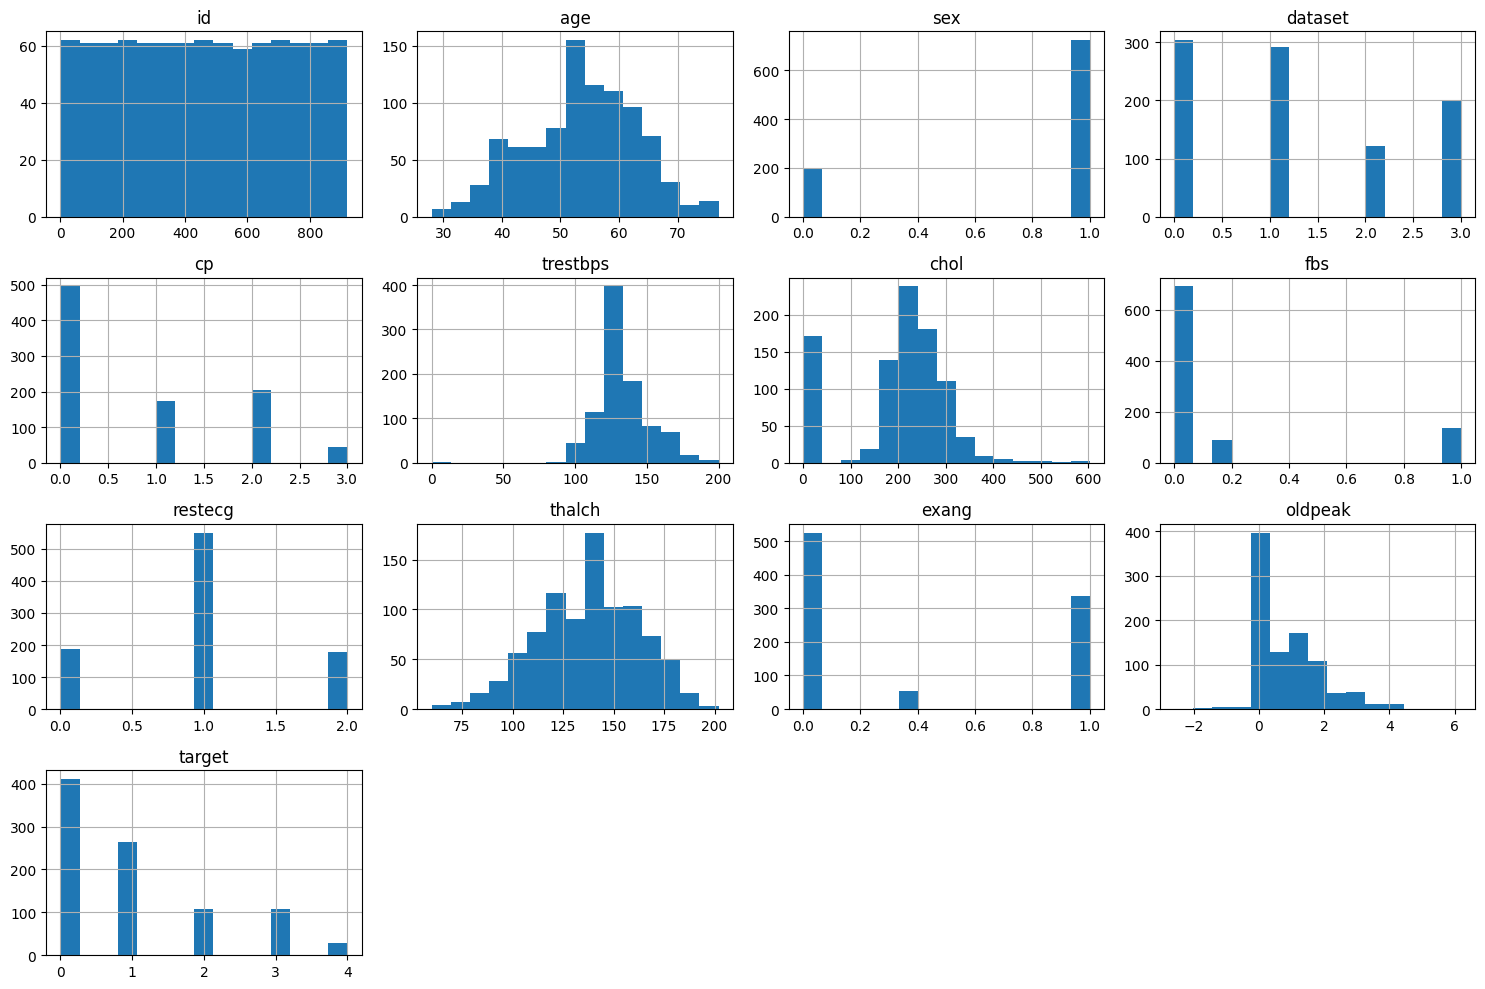

In [18]:
# Exploratory data analysis

# Visualize the distribution of numerical features
print("\nDistribution of numerical features:")
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


Pair plot of features:


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) th

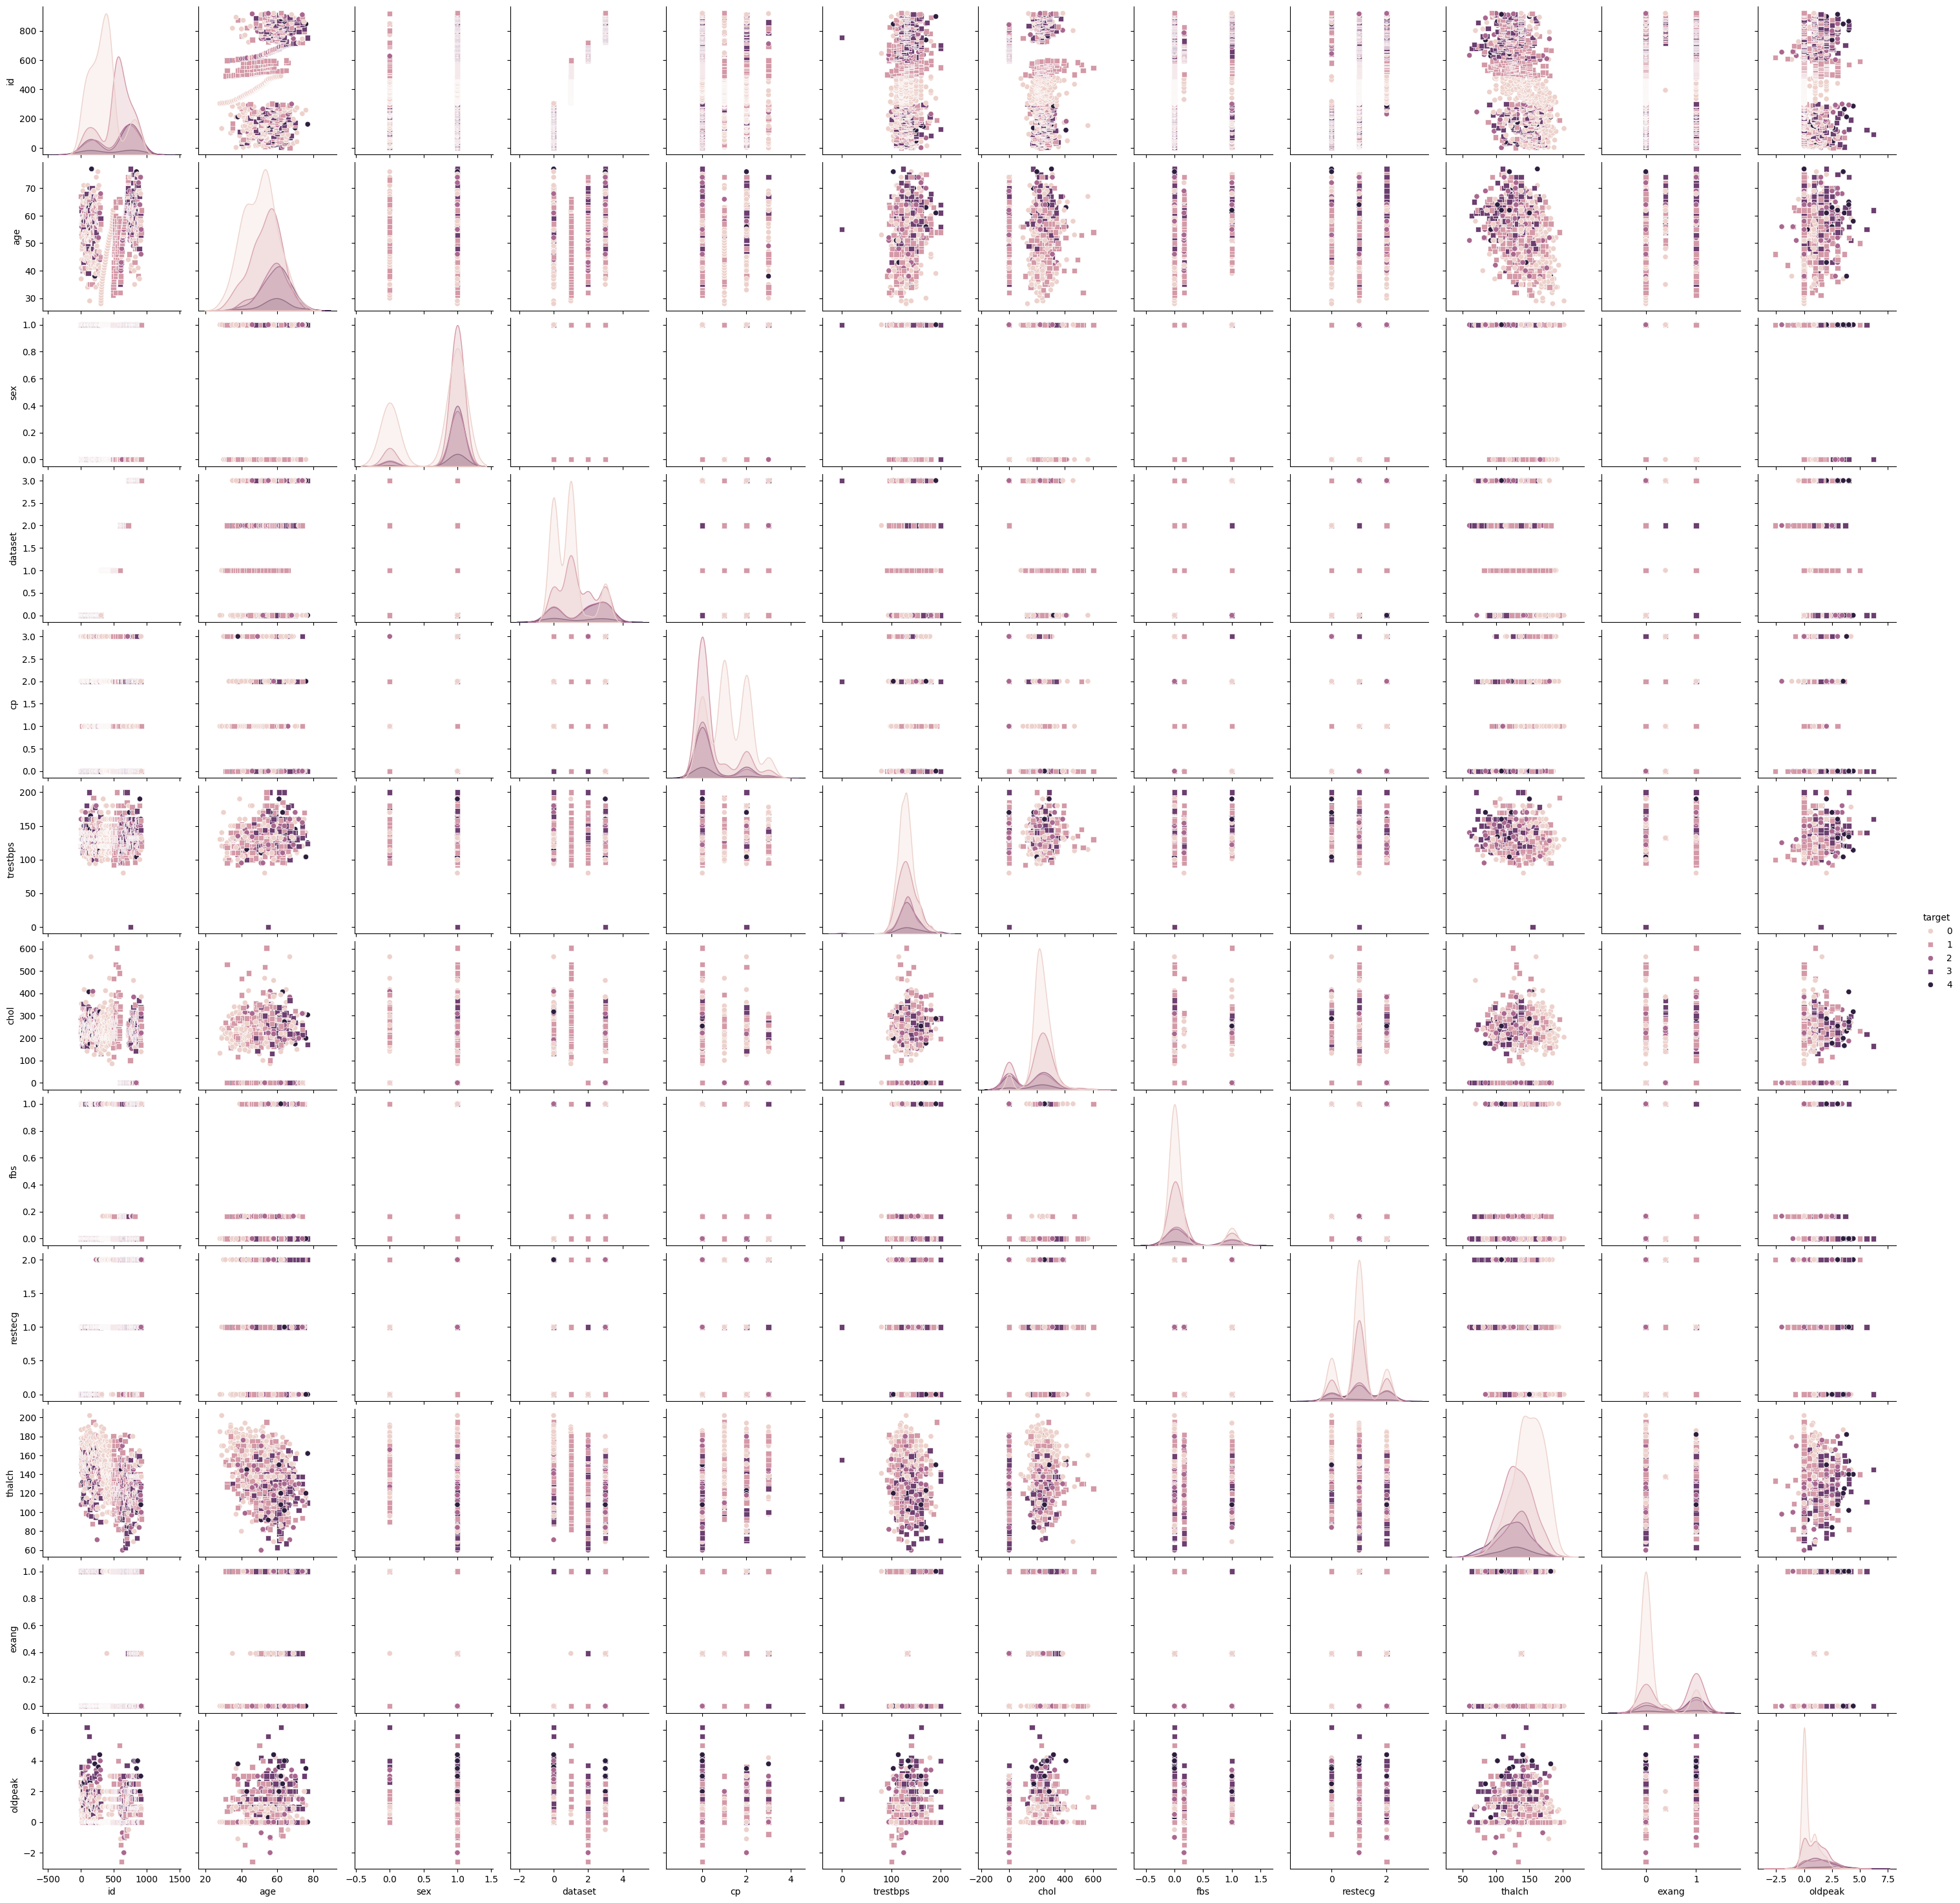

In [19]:
# Explore the relationships between features using pair plots
print("\nPair plot of features:")
sns.pairplot(data, diag_kind='kde', hue='target', markers=["o", "s"])  # Pair plot colored by the target variable
plt.show()


Correlation matrix:


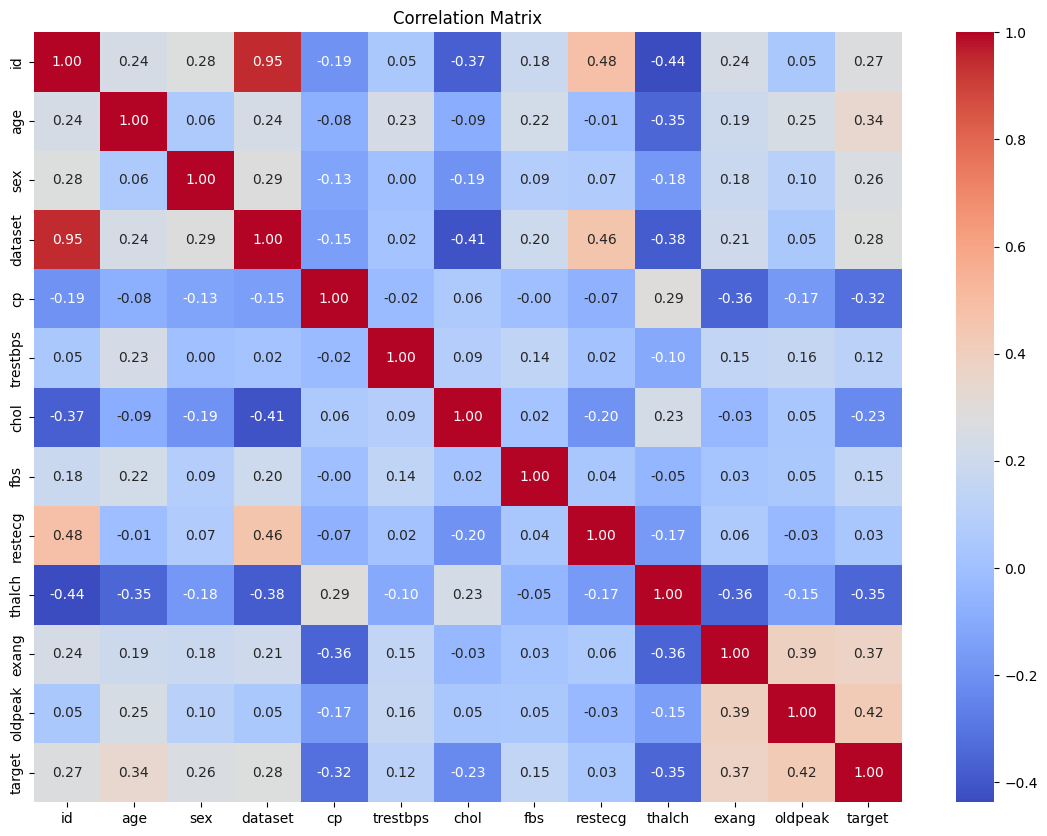

In [20]:
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = data.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Countplot of target variable:


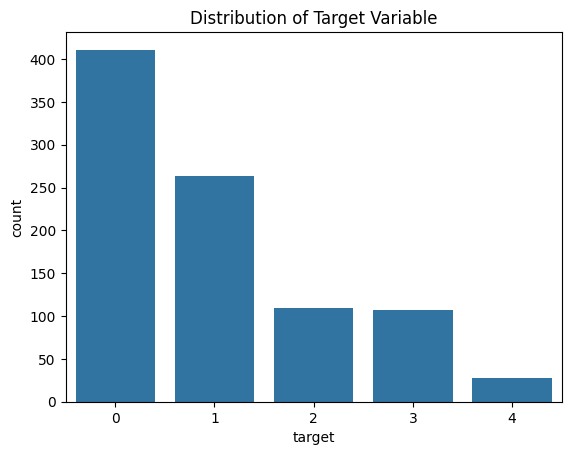

In [28]:
# Visualize the distribution of the target variable using a countplot
print("\nCountplot of target variable:")
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

In [21]:
# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert to binary classification

In [22]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8043
Precision: 0.8598
Recall: 0.8142
F1 Score: 0.8364

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        71
           1       0.86      0.81      0.84       113

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.81      0.80      0.81       184



Accuracy: 80.43% indicates that the model correctly classifies heart disease presence or absence 80.43% of the time.
Precision: 85.98% reflects that when the model predicts the presence of heart disease, it is correct 85.98% of the time.
Recall: 81.42% means the model identifies 81.42% of the actual cases of heart disease.
F1 Score: 83.64% balances precision and recall, providing a single metric to gauge overall performance.
In the classification report:

Class 0 (No heart disease): The model has a precision of 73%, recall of 79%, and an F1 score of 76%. While the recall is relatively high, indicating good identification of non-heart disease cases, the precision is lower, suggesting some false positives.
Class 1 (Heart disease): The model achieves a precision of 86%, recall of 81%, and an F1 score of 84%. This suggests that the model is fairly reliable in predicting heart disease cases, with a good balance between precision and recall.
Overall, the model performs well, with a strong balance between precision and recall, especially for predicting heart disease. However, there is room for improvement, particularly in reducing false positives for non-heart disease cases.

In [27]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

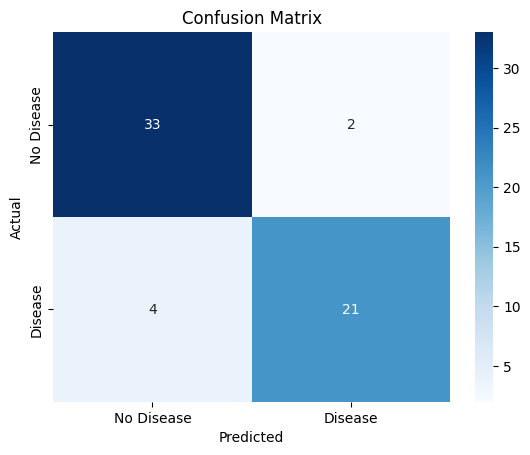

In [36]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can see, that distribution of the results of the confusion matrix represents the destribution of results on test model. So we can say, thet our model performs well